# Library import

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import os
import json

# from google.colab import drive # delete this line if not used on colab
# drive.mount("/content/drive", force_remount = True) # delete this line if not used on colab

Mounted at /content/drive


In [2]:
result_path = "/content/drive/MyDrive/TFE/Results/SelfTraining"
image_path = "/content/drive/MyDrive/TFE/Images/SelfTraining"
tex_path = "/content/drive/MyDrive/TFE/Texfile/SelfTraining"
metrics = ["accuracy", "precision", "recall", "f1", 'roc_auc', 'pr_auc']

# Latex table generation

In [ ]:
def generate_latex_table(dicts_list, method_names, caption="Comparaison des performances des variantes", metrics=["accuracy", "precision", "recall", "f1", "pr_auc", "roc_auc"]):
    """
    Generates a LaTeX table summarizing performance metrics for multiple models.

    Args:
        dicts_list (list of dict): A list of dictionaries, each containing metric results for a method.
        method_names (list of str): List of method names to be used as row labels in the table (model + config).
        caption (str, optional): Caption text for the LaTeX table. Defaults to "Comparaison des performances des variantes".
        metrics (list of str, optional): List of metric identifiers to include in the table. Defaults to common classification metrics.

    Returns:
        str: A string containing the complete LaTeX code for the table.
    """
    # Define the display names for each metric (used as table headers)
    metrics_name = ["Accuracy", "Precision", "Recall", "F1", "PR AUC", "ROC AUC"]

    # Start LaTeX table environment
    latex_str = "\\begin{table}[H]\n\\centering\n"
    latex_str += "\\begin{tabular}{l|" + "c" * len(metrics) + "}\n"
    latex_str += "\\hline\n"

    # Header row
    latex_str += "Model & " + " & ".join(metrics_name) + " \\\\\n"
    latex_str += "\\hline\n"

    # Table rows with metric values
    for method_name, dict_save in zip(method_names, dicts_list):
        values = [f"{dict_save['metrics'][f'{metric}_mean']:.2f} $\pm$ {dict_save['metrics'][f'{metric}_std']:.2f}" for metric in metrics]
        latex_str += f"{method_name} & " + " & ".join(values) + " \\\\\n"

    # Close the table
    latex_str += "\\hline\n"
    latex_str += "\\end{tabular}\n"

    # Add caption to the table
    latex_str += f"\\caption{{{caption}}}\n"

    latex_str += "\\label{tab:comparison}\n"
    latex_str += "\\end{table}"

    return latex_str

In [ ]:
model = "BiLSTM"
pseudo_label_tech_dict = {"TopK": [], "optimal": [], "fixed": []}
names = {"TopK": [], "optimal": [], "fixed": []}

for file in os.listdir(f"{result_path}/{model}"):
    for tech in pseudo_label_tech_dict.keys():
        if tech in file and (tech != 'fixed' or 'TopK' not in file):
            with open(f"{result_path}/{model}/{file}", "r") as f:
                pseudo_label_tech_dict[tech].append(json.load(f))
                n = file.split("CVSummary_")[1].replace(".json", "")
                n = n.replace("double_loss", "DL").replace("hard_loss", "HL").replace("soft_loss", "SL").replace("praucstop", "PR").replace("__", "_")
                if tech != 'optimal':
                    parts = n.split("_")
                    threshold = parts[-1]
                    rest = parts[:-1]
                    new_parts = [rest[0], threshold] + rest[1:] if tech == "fixed" else [rest[0], rest[1], threshold] + rest[2:]
                    n = "\\_".join(new_parts)
                else:
                    n.replace("_", "\\_")

                names[tech].append(f"{model}\\_{n}")
            break

for tech, tech_list in pseudo_label_tech_dict.items():
    latex_str = generate_latex_table(tech_list, names[tech], "Testing youhou BiLSTM")

    output_file = f"{tex_path}/{model}_{tech}.tex"
    with open(output_file, "w") as f:
        f.write(latex_str)

In [ ]:
model = "MLP"
pseudo_label_tech_dict = {"TopK": [], "optimal": [], "fixed": []}
names = {"TopK": [], "optimal": [], "fixed": []}

for file in os.listdir(f"{result_path}/{model}"):
    for tech in pseudo_label_tech_dict.keys():
        if tech in file and (tech != 'fixed' or 'TopK' not in file):
            with open(f"{result_path}/{model}/{file}", "r") as f:
                pseudo_label_tech_dict[tech].append(json.load(f))
                n = file.split("CVSummary_")[1].replace(".json", "")
                n = n.replace("double_loss", "DL").replace("hard_loss", "HL").replace("soft_loss", "SL").replace("praucstop", "PR").replace("__", "_")
                if tech != 'optimal':
                    parts = n.split("_")
                    threshold = parts[-1]
                    rest = parts[:-1]
                    new_parts = [rest[0], threshold] + rest[1:] if tech == "fixed" else [rest[0], rest[1], threshold] + rest[2:]
                    n = "\\_".join(new_parts)
                else:
                    n.replace("_", "\\_")

                names[tech].append(f"{model}\\_{n}")
            break

for tech, tech_list in pseudo_label_tech_dict.items():
    latex_str = generate_latex_table(tech_list, names[tech], "Testing youhou MLP")

    output_file = f"{tex_path}/{model}_{tech}.tex"
    with open(output_file, "w") as f:
        f.write(latex_str)

# PR AUC stopping criterion effect

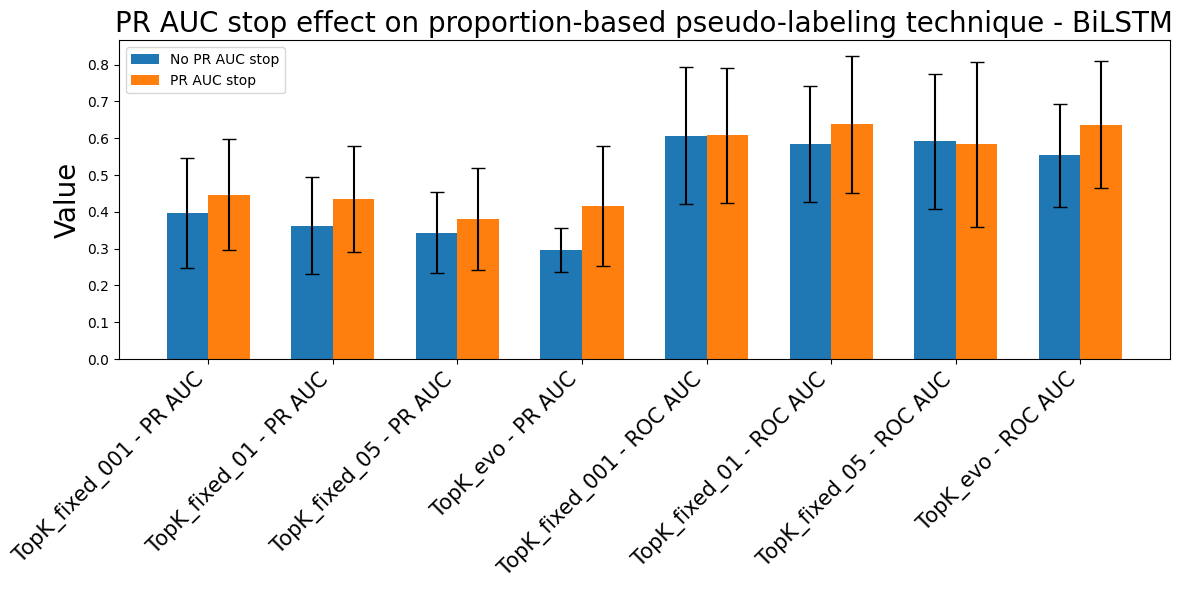

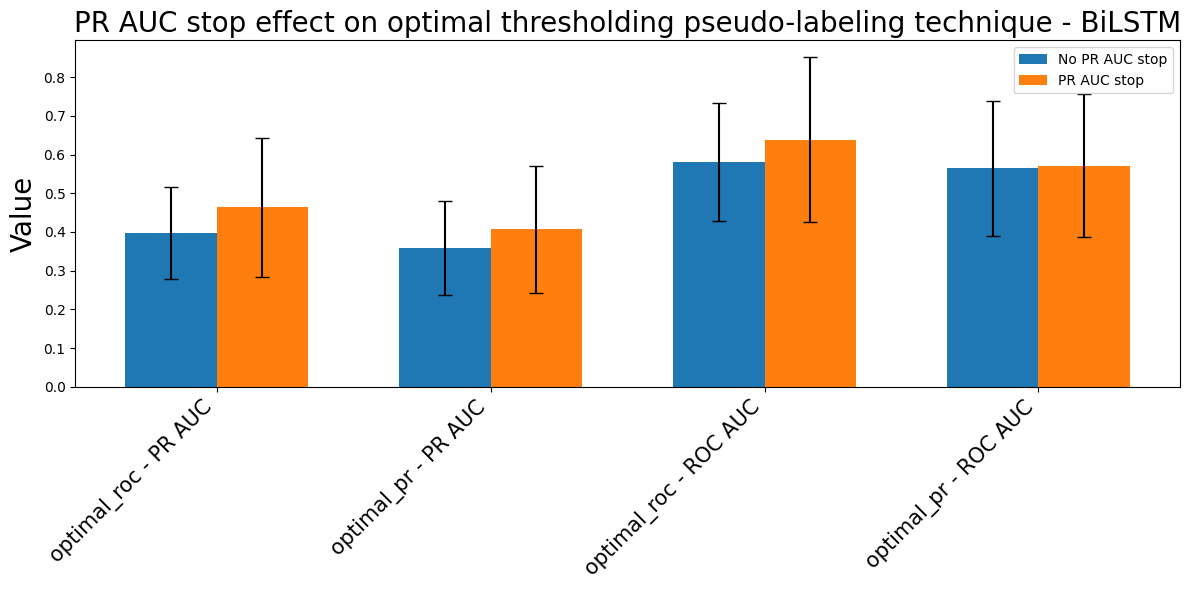

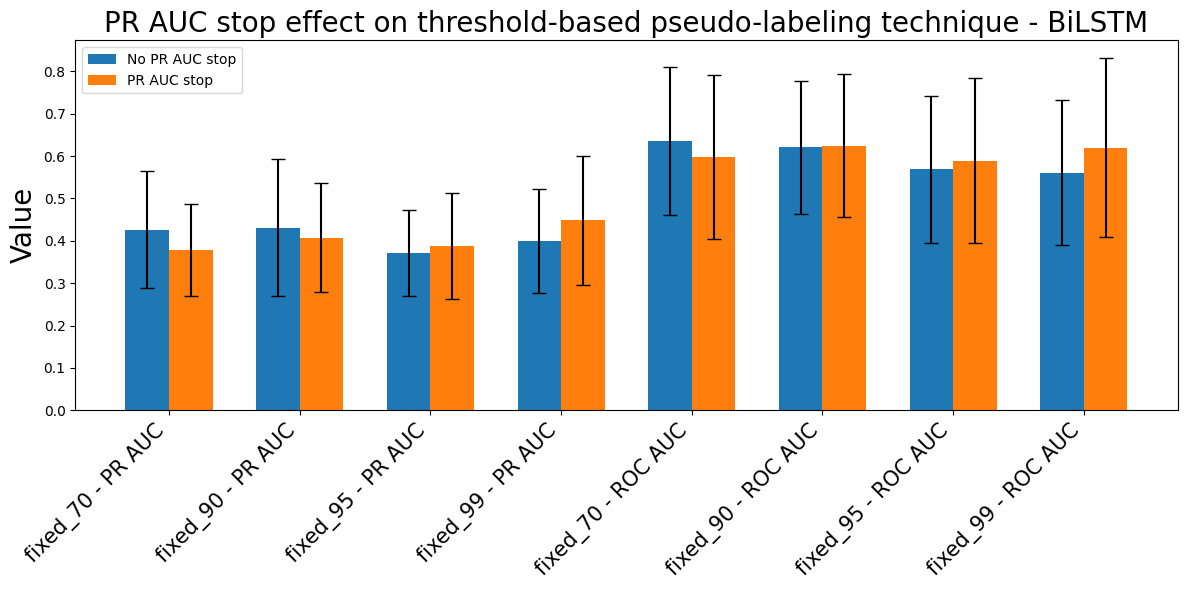

In [ ]:
model = "BiLSTM"
pseudo_label_tech_dict = {"TopK": [], "optimal": [], "fixed": []}
names = {"TopK": [], "optimal": [], "fixed": []}

for file in os.listdir(f"{result_path}/{model}"):
    if "soft" not in file and "double" not in file:
        for tech in pseudo_label_tech_dict.keys():
            if tech in file and (tech != 'fixed' or 'TopK' not in file):
                with open(f"{result_path}/{model}/{file}", "r") as f:
                    pseudo_label_tech_dict[tech].append(json.load(f))
                    n = file.split("CVSummary_")[1].replace(".json", "")
                    n = n.replace("double_loss", "DL").replace("hard_loss", "HL").replace("soft_loss", "SL").replace("praucstop", "PR").replace("__", "_")
                    if tech != 'optimal':
                        parts = n.split("_")
                        threshold = parts[-1]
                        rest = parts[:-1]
                        new_parts = [rest[0], threshold] + rest[1:] if tech == "fixed" else [rest[0], rest[1], threshold] + rest[2:]
                        n = "_".join(new_parts)

                    names[tech].append(f"{model}_{n}")
                break

title_names = {"TopK": "proportion-based", "optimal": "optimal thresholding", "fixed": "threshold-based"}
indices_dict = {"TopK": {"evo": 3, "00": 0, "01": 1, "05": 2}, "optimal": {"pr": 0, "roc": 1}, "fixed": {"70": 0, "90": 1, "95": 2, "99":3}}

for tech, tech_list in pseudo_label_tech_dict.items():
    ns = names[tech]

    plt.figure(figsize=(12, 6))

    pr_labels = []
    roc_labels = []

    no_stop_color = '#1f77b4'  # blue
    stop_color = '#ff7f0e'     # orange
    colors = {"No PR AUC stop": no_stop_color, "PR AUC stop": stop_color}

    plt.bar(0, 0, color=colors["No PR AUC stop"], label="No PR AUC stop")
    plt.bar(0, 0, color=colors["PR AUC stop"], label="PR AUC stop")

    bar_width = 0.4
    group_spacing = 1.2

    for i, dict_ in enumerate(tech_list):
        model_name = ns[i].replace(f'{model}_', '')

        for key, value in indices_dict[tech].items():
            if key in ns[i]:
                idx = value
                break

        label_type = "No PR AUC stop" if "HL_PR" not in ns[i] else "PR AUC stop"
        color = colors[label_type]

        pr_pos = (idx * group_spacing) - bar_width / 2 if "HL_PR" not in ns[i] else (idx * group_spacing) + bar_width / 2
        roc_pos = ((idx + len(ns) / 12) * group_spacing) + len(indices_dict[tech].keys()) - bar_width / 2 if "HL_PR" not in ns[i] else ((idx+ len(ns) / 12) * group_spacing) + len(indices_dict[tech].keys()) + bar_width / 2

        plt.bar(pr_pos, dict_['metrics']['pr_auc_mean'], yerr = dict_['metrics']['pr_auc_std'], width=bar_width, color=color, capsize=5)
        plt.bar(roc_pos, dict_['metrics']['roc_auc_mean'], yerr = dict_['metrics']['roc_auc_std'], width=bar_width, color=color, capsize=5)

        if "HL_PR" not in ns[i]:
            pr_labels.append(model_name.replace("00", "001").replace("evo_60", "evo").replace("evo_01", "evo") + " - PR AUC")
            roc_labels.append(model_name.replace("00", "001").replace("evo_60", "evo").replace("evo_01", "evo") + " - ROC AUC")

    plt.xticks(np.arange(0, len(ns), 1) * group_spacing, pr_labels + roc_labels, rotation=45, ha="right", fontsize=15)
    plt.ylabel('Value', fontsize=20)
    title = f'PR AUC stop effect on {title_names[tech]} pseudo-labeling technique - {model}'
    plt.title(title, fontsize=20)
    plt.legend()
    plt.tight_layout()
    plt.savefig(f"{image_path}/{model}/{model}_{title.replace('-', '').replace(' ', '_')}")
    plt.show()
    plt.close()


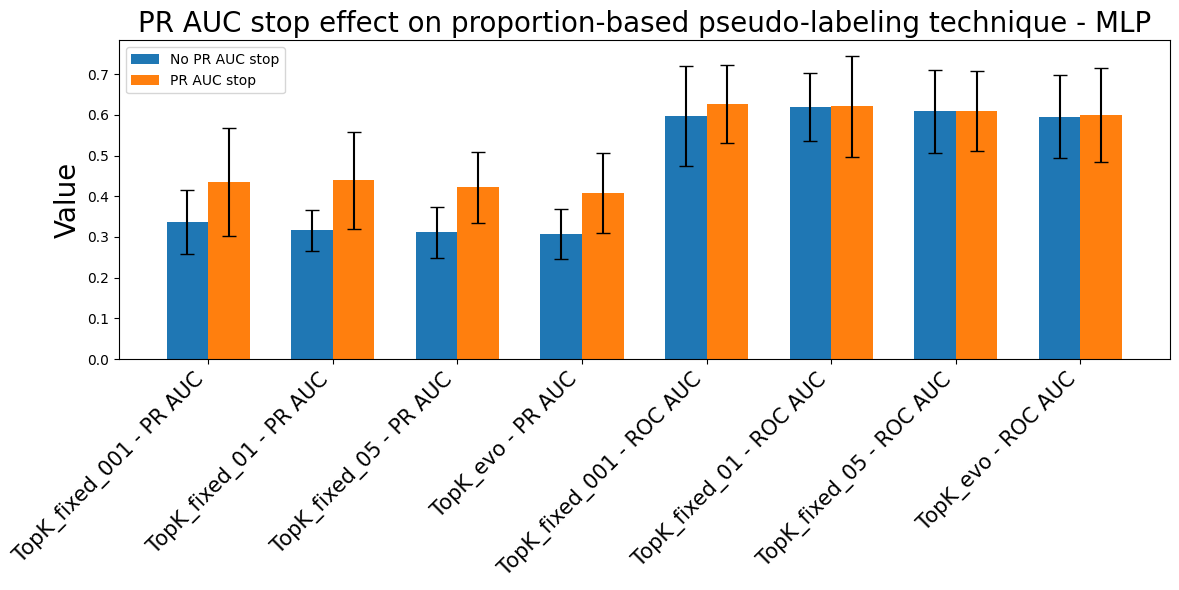

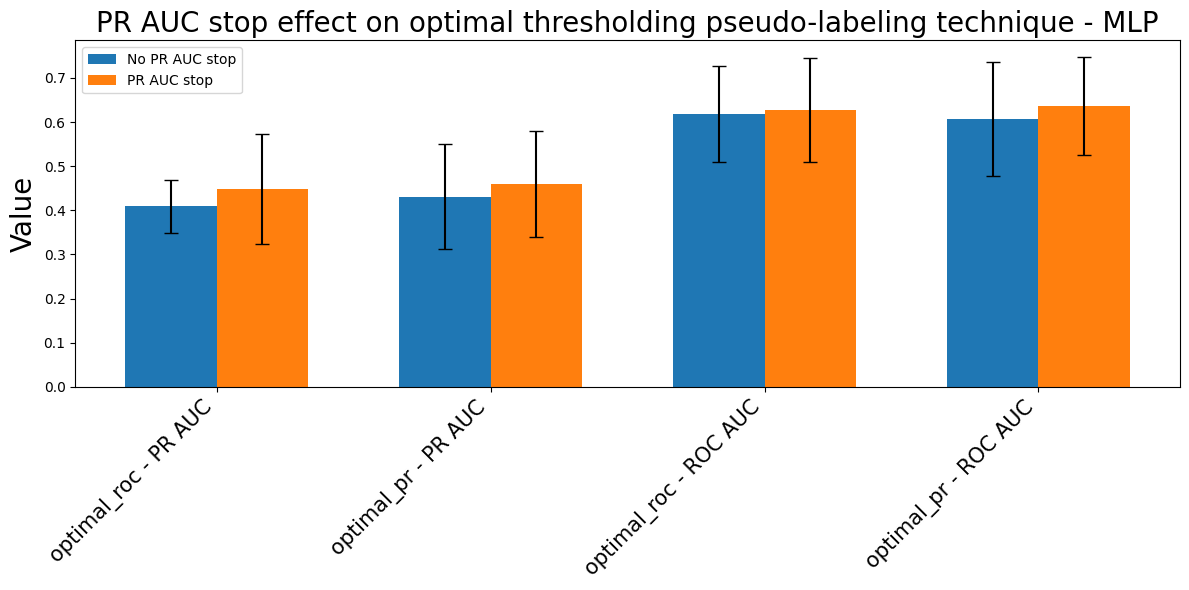

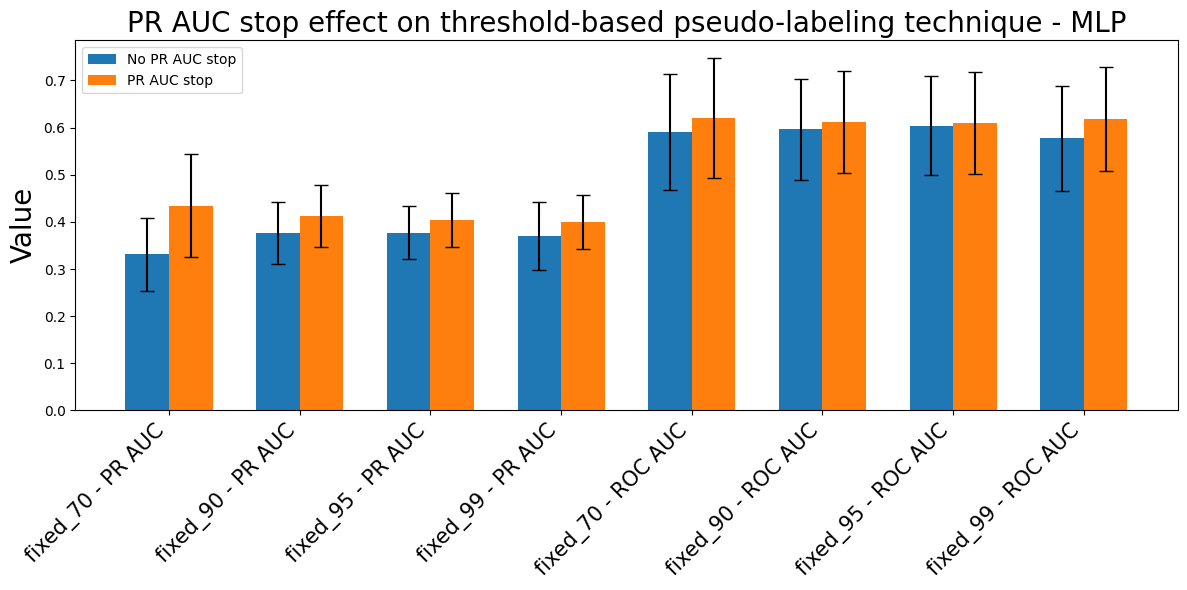

In [ ]:
model = "MLP"
pseudo_label_tech_dict = {"TopK": [], "optimal": [], "fixed": []}
names = {"TopK": [], "optimal": [], "fixed": []}

for file in os.listdir(f"{result_path}/{model}"):
    if "soft" not in file and "double" not in file:
        for tech in pseudo_label_tech_dict.keys():
            if tech in file and (tech != 'fixed' or 'TopK' not in file):
                with open(f"{result_path}/{model}/{file}", "r") as f:
                    pseudo_label_tech_dict[tech].append(json.load(f))
                    n = file.split("CVSummary_")[1].replace(".json", "")
                    n = n.replace("double_loss", "DL").replace("hard_loss", "HL").replace("soft_loss", "SL").replace("praucstop", "PR").replace("__", "_")
                    if tech != 'optimal':
                        parts = n.split("_")
                        threshold = parts[-1]
                        rest = parts[:-1]
                        new_parts = [rest[0], threshold] + rest[1:] if tech == "fixed" else [rest[0], rest[1], threshold] + rest[2:]
                        n = "_".join(new_parts)

                    names[tech].append(f"{model}_{n}")
                break

title_names = {"TopK": "proportion-based", "optimal": "optimal thresholding", "fixed": "threshold-based"}
indices_dict = {"TopK": {"evo": 3, "00": 0, "01": 1, "05": 2}, "optimal": {"pr": 0, "roc": 1}, "fixed": {"70": 0, "90": 1, "95": 2, "99":3}}

for tech, tech_list in pseudo_label_tech_dict.items():
    ns = names[tech]

    plt.figure(figsize=(12, 6))

    pr_labels = []
    roc_labels = []

    no_stop_color = '#1f77b4'  # blue
    stop_color = '#ff7f0e'     # orange
    colors = {"No PR AUC stop": no_stop_color, "PR AUC stop": stop_color}

    plt.bar(0, 0, color=colors["No PR AUC stop"], label="No PR AUC stop")
    plt.bar(0, 0, color=colors["PR AUC stop"], label="PR AUC stop")

    bar_width = 0.4
    group_spacing = 1.2

    for i, dict_ in enumerate(tech_list):
        model_name = ns[i].replace(f'{model}_', '')

        for key, value in indices_dict[tech].items():
            if key in ns[i]:
                idx = value
                break

        label_type = "No PR AUC stop" if "HL_PR" not in ns[i] else "PR AUC stop"
        color = colors[label_type]

        pr_pos = (idx * group_spacing) - bar_width / 2 if "HL_PR" not in ns[i] else (idx * group_spacing) + bar_width / 2
        roc_pos = ((idx + len(ns) / 12) * group_spacing) + len(indices_dict[tech].keys()) - bar_width / 2 if "HL_PR" not in ns[i] else ((idx+ len(ns) / 12) * group_spacing) + len(indices_dict[tech].keys()) + bar_width / 2

        plt.bar(pr_pos, dict_['metrics']['pr_auc_mean'], yerr = dict_['metrics']['pr_auc_std'], width=bar_width, color=color, capsize=5)
        plt.bar(roc_pos, dict_['metrics']['roc_auc_mean'], yerr = dict_['metrics']['roc_auc_std'], width=bar_width, color=color, capsize=5)

        if "HL_PR" not in ns[i]:
            pr_labels.append(model_name.replace("00", "001").replace("evo_60", "evo").replace("evo_01", "evo") + " - PR AUC")
            roc_labels.append(model_name.replace("00", "001").replace("evo_60", "evo").replace("evo_01", "evo") + " - ROC AUC")

    plt.xticks(np.arange(0, len(ns), 1) * group_spacing, pr_labels + roc_labels, rotation=45, ha="right", fontsize=15)
    plt.ylabel('Value', fontsize=20)
    title = f'PR AUC stop effect on {title_names[tech]} pseudo-labeling technique - {model}'
    plt.title(title, fontsize=20)
    plt.legend()
    plt.tight_layout()
    plt.savefig(f"{image_path}/{model}/{model}_{title.replace('-', '').replace(' ', '_')}")
    plt.show()
    plt.close()

# Hard loss vs soft loss

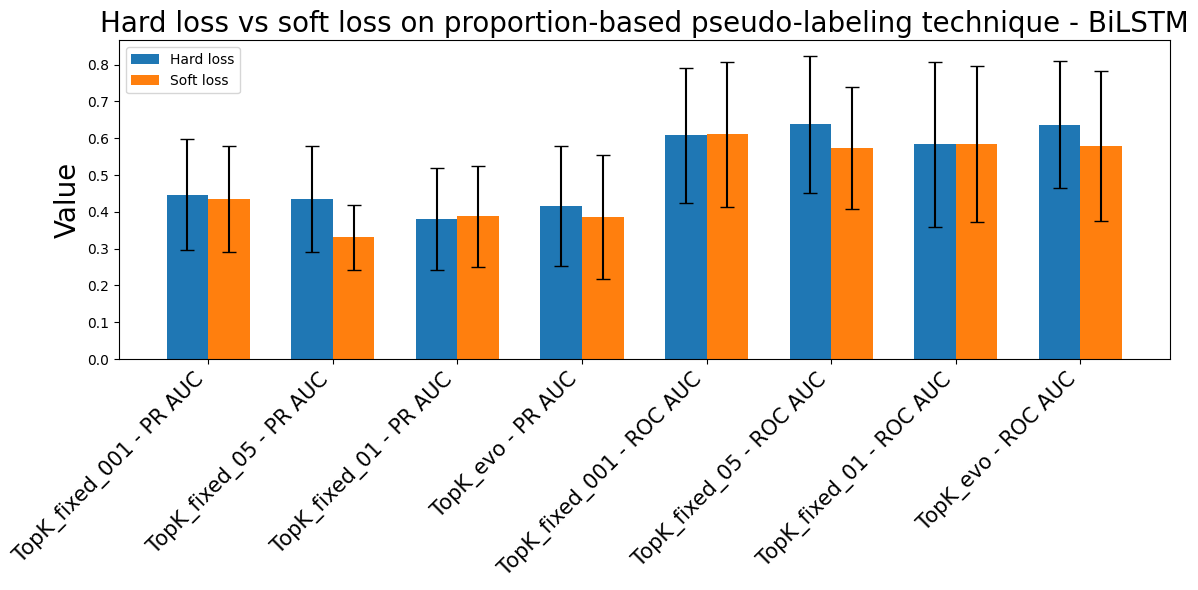

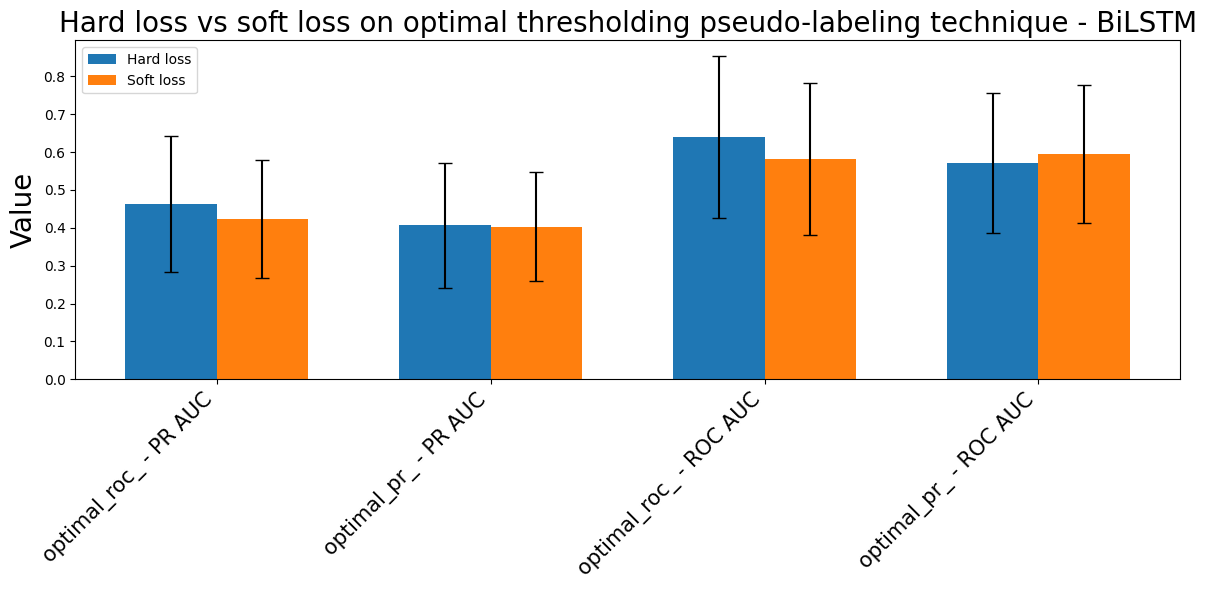

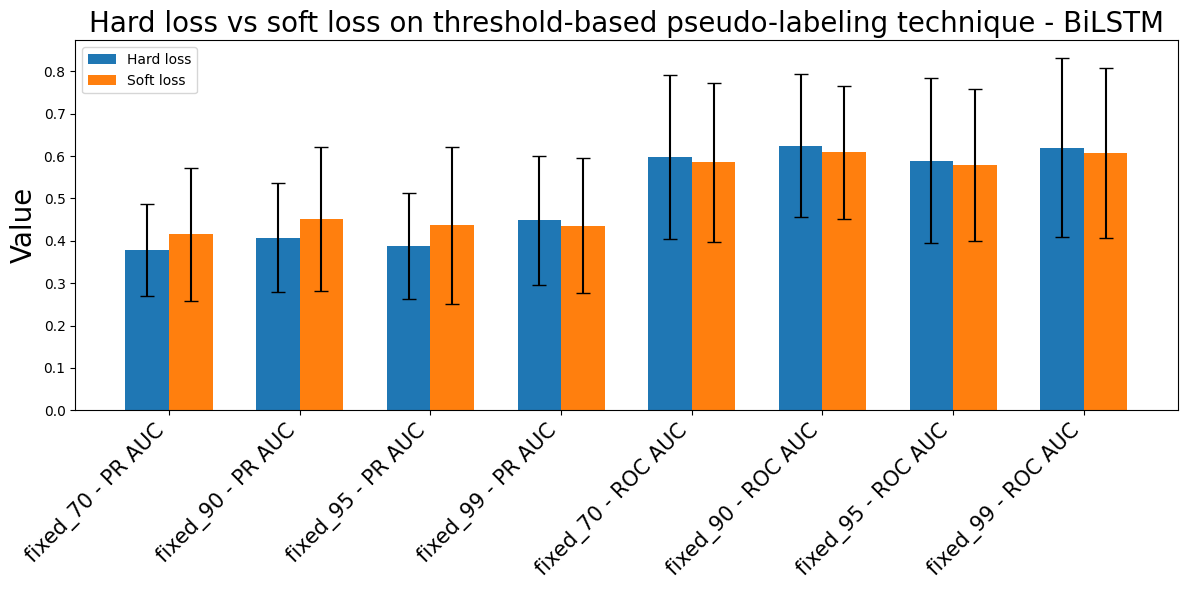

In [ ]:
model = "BiLSTM"
pseudo_label_tech_dict = {"TopK": [], "optimal": [], "fixed": []}
names = {"TopK": [], "optimal": [], "fixed": []}

for file in os.listdir(f"{result_path}/{model}"):
    if ("soft" in file or "hard" in file) and "double" not in file and "prauc" in file:
        for tech in pseudo_label_tech_dict.keys():
            if tech in file and (tech != 'fixed' or 'TopK' not in file):
                with open(f"{result_path}/{model}/{file}", "r") as f:
                    pseudo_label_tech_dict[tech].append(json.load(f))
                    n = file.split("CVSummary_")[1].replace(".json", "")
                    n = n.replace("double_loss", "DL").replace("hard_loss", "HL").replace("soft_loss", "SL").replace("praucstop", "PR").replace("__", "_")
                    if tech != 'optimal':
                        parts = n.split("_")
                        threshold = parts[-1]
                        rest = parts[:-1]
                        new_parts = [rest[0], threshold] + rest[1:] if tech == "fixed" else [rest[0], rest[1], threshold] + rest[2:]
                        n = "_".join(new_parts)

                    names[tech].append(f"{model}_{n}")
                break

title_names = {"TopK": "proportion-based", "optimal": "optimal thresholding", "fixed": "threshold-based"}
indices_dict = {"TopK": {"evo": 3, "00": 0, "01": 1, "05": 2}, "optimal": {"pr": 0, "roc": 1}, "fixed": {"70": 0, "90": 1, "95": 2, "99":3}}

for tech, tech_list in pseudo_label_tech_dict.items():
    ns = names[tech]

    plt.figure(figsize=(12, 6))

    pr_labels = []
    roc_labels = []

    hard_loss_color = '#1f77b4'  # blue
    soft_loss_color = '#ff7f0e'     # orange
    colors = {"Hard loss": hard_loss_color, "Soft loss": soft_loss_color}

    plt.bar(0, 0, color=colors["Hard loss"], label="Hard loss")
    plt.bar(0, 0, color=colors["Soft loss"], label="Soft loss")

    bar_width = 0.4
    group_spacing = 1.2

    for i, dict_ in enumerate(tech_list):
        model_name = ns[i].replace(f'{model}_', '')

        for key, value in indices_dict[tech].items():
            if key in ns[i]:
                idx = value
                break

        label_type = "Hard loss" if "HL" in ns[i] else "Soft loss"
        color = colors[label_type]

        pr_pos = (idx * group_spacing) - bar_width / 2 if "HL" in ns[i] else (idx * group_spacing) + bar_width / 2
        roc_pos = ((idx + len(ns) / 12) * group_spacing) + len(indices_dict[tech].keys()) - bar_width / 2 if "HL" in ns[i] else ((idx+ len(ns) / 12) * group_spacing) + len(indices_dict[tech].keys()) + bar_width / 2

        plt.bar(pr_pos, dict_['metrics']['pr_auc_mean'], yerr = dict_['metrics']['pr_auc_std'], width=bar_width, color=color, capsize=5)
        plt.bar(roc_pos, dict_['metrics']['roc_auc_mean'], yerr = dict_['metrics']['roc_auc_std'], width=bar_width, color=color, capsize=5)

        if "SL" not in ns[i]:
            pr_labels.append(model_name.replace("00", "001").replace("evo_60", "evo").replace("evo_01", "evo").replace("_HL_PR", "") + " - PR AUC")
            roc_labels.append(model_name.replace("00", "001").replace("evo_60", "evo").replace("evo_01", "evo").replace("_HL_PR", "") + " - ROC AUC")

    plt.xticks(np.arange(0, len(ns), 1) * group_spacing, pr_labels + roc_labels, rotation=45, ha="right", fontsize=15)
    plt.ylabel('Value', fontsize=20)
    title = f'Hard loss vs soft loss on {title_names[tech]} pseudo-labeling technique - {model}'
    plt.title(title, fontsize=20)
    plt.legend()
    plt.tight_layout()
    plt.savefig(f"{image_path}/{model}/{model}_{title.replace('-', '').replace(' ', '_')}")
    plt.show()
    plt.close()

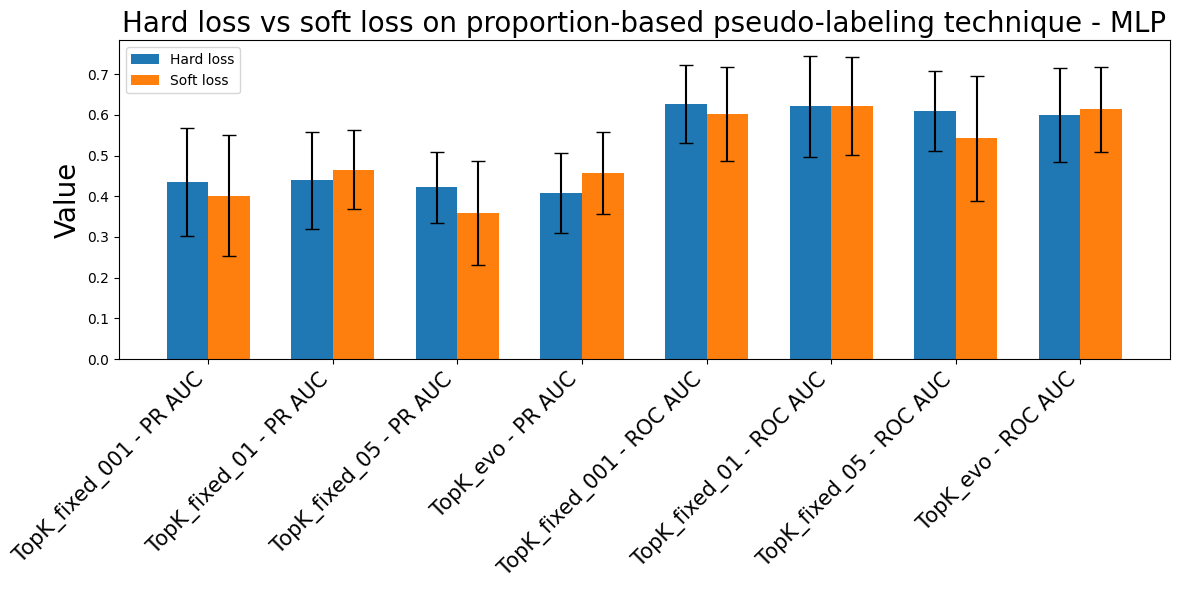

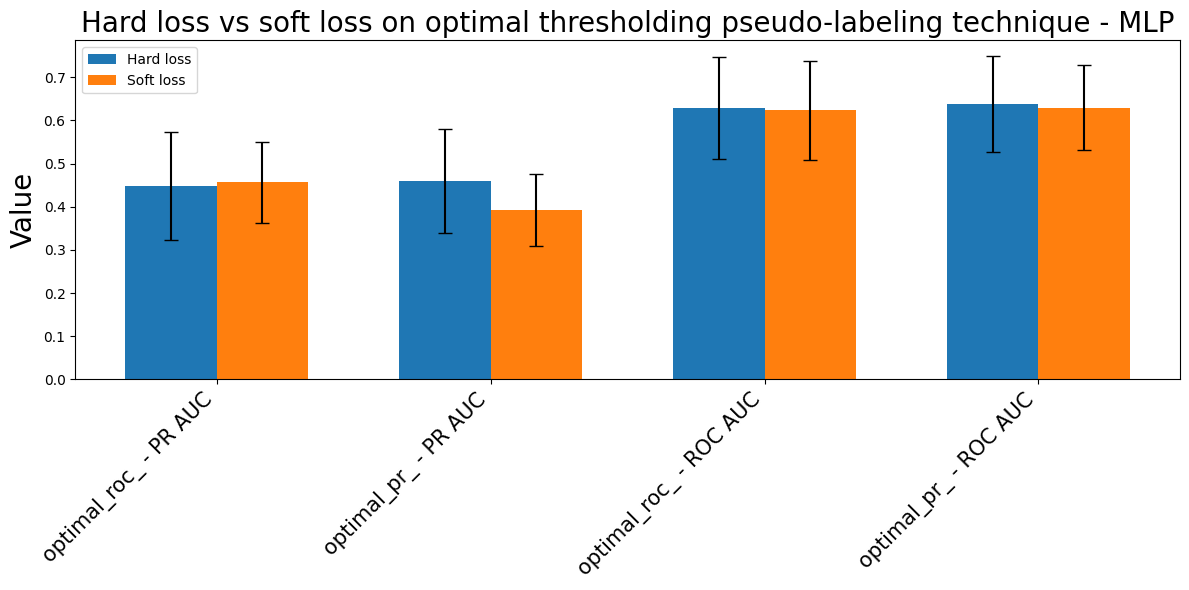

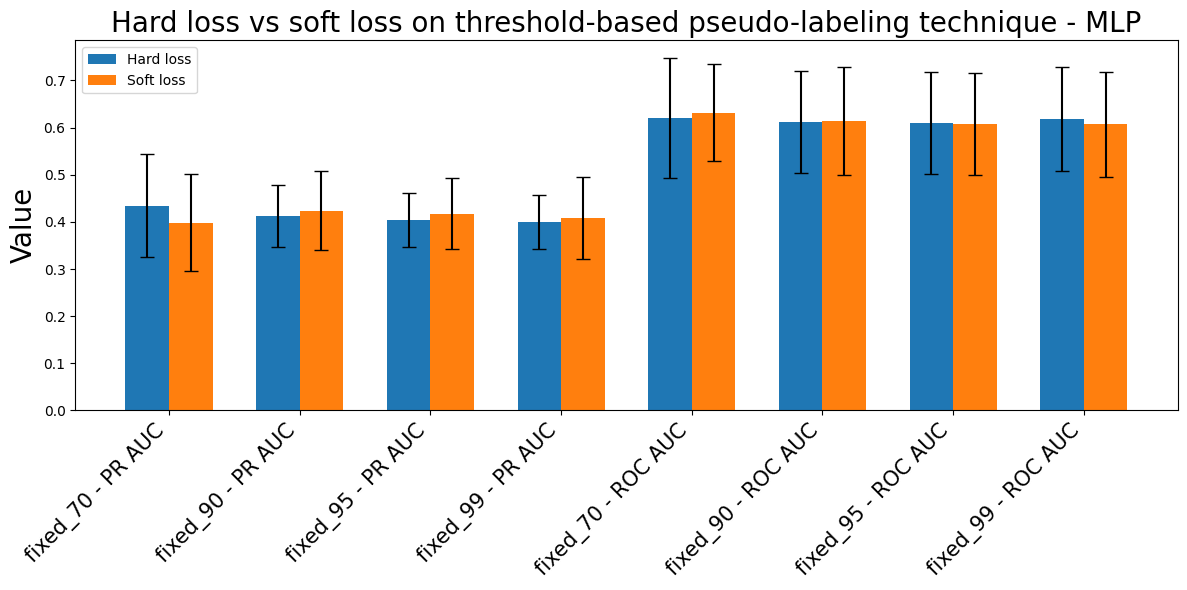

In [ ]:
model = "MLP"
pseudo_label_tech_dict = {"TopK": [], "optimal": [], "fixed": []}
names = {"TopK": [], "optimal": [], "fixed": []}

for file in os.listdir(f"{result_path}/{model}"):
    if ("soft" in file or "hard" in file) and "double" not in file and "prauc" in file:
        for tech in pseudo_label_tech_dict.keys():
            if tech in file and (tech != 'fixed' or 'TopK' not in file):
                with open(f"{result_path}/{model}/{file}", "r") as f:
                    pseudo_label_tech_dict[tech].append(json.load(f))
                    n = file.split("CVSummary_")[1].replace(".json", "")
                    n = n.replace("double_loss", "DL").replace("hard_loss", "HL").replace("soft_loss", "SL").replace("praucstop", "PR").replace("__", "_")
                    if tech != 'optimal':
                        parts = n.split("_")
                        threshold = parts[-1]
                        rest = parts[:-1]
                        new_parts = [rest[0], threshold] + rest[1:] if tech == "fixed" else [rest[0], rest[1], threshold] + rest[2:]
                        n = "_".join(new_parts)

                    names[tech].append(f"{model}_{n}")
                break

title_names = {"TopK": "proportion-based", "optimal": "optimal thresholding", "fixed": "threshold-based"}
indices_dict = {"TopK": {"evo": 3, "00": 0, "01": 1, "05": 2}, "optimal": {"pr": 0, "roc": 1}, "fixed": {"70": 0, "90": 1, "95": 2, "99":3}}

for tech, tech_list in pseudo_label_tech_dict.items():
    ns = names[tech]

    plt.figure(figsize=(12, 6))

    pr_labels = []
    roc_labels = []

    hard_loss_color = '#1f77b4'  # blue
    soft_loss_color = '#ff7f0e'     # orange
    colors = {"Hard loss": hard_loss_color, "Soft loss": soft_loss_color}

    plt.bar(0, 0, color=colors["Hard loss"], label="Hard loss")
    plt.bar(0, 0, color=colors["Soft loss"], label="Soft loss")

    bar_width = 0.4
    group_spacing = 1.2

    for i, dict_ in enumerate(tech_list):
        model_name = ns[i].replace(f'{model}_', '')

        for key, value in indices_dict[tech].items():
            if key in ns[i]:
                idx = value
                break

        label_type = "Hard loss" if "HL" in ns[i] else "Soft loss"
        color = colors[label_type]

        pr_pos = (idx * group_spacing) - bar_width / 2 if "HL" in ns[i] else (idx * group_spacing) + bar_width / 2
        roc_pos = ((idx + len(ns) / 12) * group_spacing) + len(indices_dict[tech].keys()) - bar_width / 2 if "HL" in ns[i] else ((idx+ len(ns) / 12) * group_spacing) + len(indices_dict[tech].keys()) + bar_width / 2

        plt.bar(pr_pos, dict_['metrics']['pr_auc_mean'], yerr = dict_['metrics']['pr_auc_std'], width=bar_width, color=color, capsize=5)
        plt.bar(roc_pos, dict_['metrics']['roc_auc_mean'], yerr = dict_['metrics']['roc_auc_std'], width=bar_width, color=color, capsize=5)

        if "SL" not in ns[i]:
            pr_labels.append(model_name.replace("00", "001").replace("evo_60", "evo").replace("evo_01", "evo").replace("_HL_PR", "") + " - PR AUC")
            roc_labels.append(model_name.replace("00", "001").replace("evo_60", "evo").replace("evo_01", "evo").replace("_HL_PR", "") + " - ROC AUC")

    plt.xticks(np.arange(0, len(ns), 1) * group_spacing, pr_labels + roc_labels, rotation=45, ha="right", fontsize=15)
    plt.ylabel('Value', fontsize=20)
    title = f'Hard loss vs soft loss on {title_names[tech]} pseudo-labeling technique - {model}'
    plt.title(title, fontsize=20)
    plt.legend()
    plt.tight_layout()
    plt.savefig(f"{image_path}/{model}/{model}_{title.replace('-', '').replace(' ', '_')}")
    plt.show()
    plt.close()

# Comparison of pseudo-labeling technique

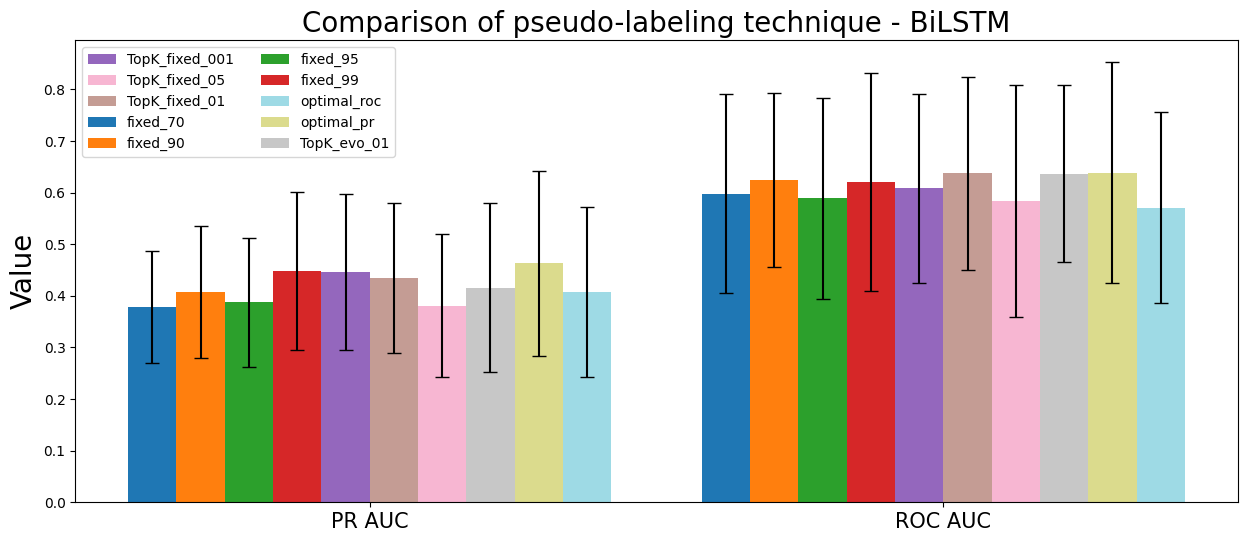

In [ ]:
model = "BiLSTM"
pseudo_label_tech_dict = []
names = []

for file in os.listdir(f"{result_path}/{model}"):
    if "hard" in file and "double" not in file and "prauc" in file:
        with open(f"{result_path}/{model}/{file}", "r") as f:
            pseudo_label_tech_dict.append(json.load(f))
            n = file.split("CVSummary_")[1].replace(".json", "")
            n = n.replace("double_loss", "DL").replace("hard_loss", "HL").replace("soft_loss", "SL").replace("praucstop", "PR").replace("__", "_")

            names.append(f"{model}_{n}")

plt.figure(figsize=(15, 6))

n = len(pseudo_label_tech_dict)
group_spacing = 1.5
bar_spacing = 0.8

indices_pr = np.arange(n) * bar_spacing
indices_roc = indices_pr + n * bar_spacing + group_spacing
indices_dict = {"TopK": {"evo": 7, "00": 4, "01": 5, "05": 6}, "optimal": {"pr": 8, "roc": 9}, "fixed": {"70": 0, "90": 1, "95": 2, "99":3}}

colors = plt.cm.tab20(np.linspace(0, 1, n))

for i, dict_ in enumerate(pseudo_label_tech_dict):
    model_name = names[i].replace(f'{model}_', '')

    for key, value in indices_dict.items():
        if key in model_name:
            for k, v in value.items():
                if k in model_name:
                    idx = v
                    break
            break

    label = model_name.replace("00", "001").replace("evo_60", "evo").replace("evo_01", "evo") \
                      .replace("_HL_PR", "").replace("roc_", "roc").replace("pr_", "pr")

    color = colors[idx]

    plt.bar(indices_pr[idx], dict_['metrics']['pr_auc_mean'], yerr=dict_['metrics']['pr_auc_std'], width=0.8, color=color, label=label, capsize=5)
    plt.bar(indices_roc[idx], dict_['metrics']['roc_auc_mean'], yerr=dict_['metrics']['roc_auc_std'], width=0.8, color=color, capsize=5)

plt.ylabel('Value', fontsize=20)
plt.title(f'Comparison of pseudo-labeling technique - {model}', fontsize=20)
plt.xticks([(min(indices_pr) + max(indices_pr)) / 2, (min(indices_roc) + max(indices_roc)) / 2], ["PR AUC", "ROC AUC"], fontsize=15)
plt.legend(loc='best', ncols=2)
plt.savefig(f"{image_path}/{model}/{model}_comparison_of_pseudo_labeling_technique.png")
plt.show()
plt.close()

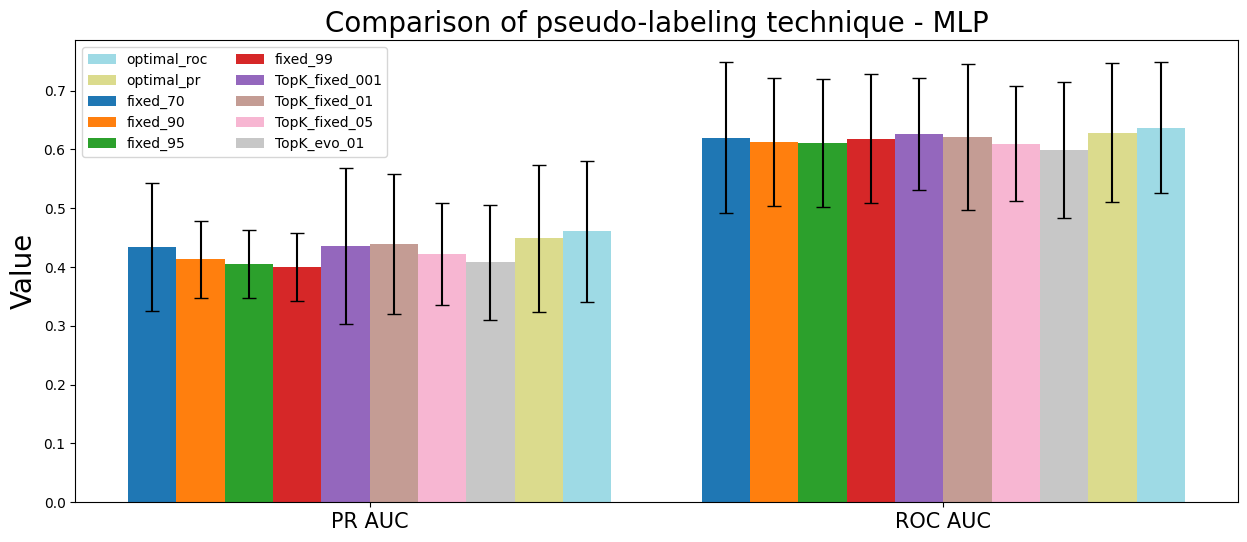

In [ ]:
model = "MLP"
pseudo_label_tech_dict = []
names = []

for file in os.listdir(f"{result_path}/{model}"):
    if "hard" in file and "double" not in file and "prauc" in file:
        with open(f"{result_path}/{model}/{file}", "r") as f:
            pseudo_label_tech_dict.append(json.load(f))
            n = file.split("CVSummary_")[1].replace(".json", "")
            n = n.replace("double_loss", "DL").replace("hard_loss", "HL").replace("soft_loss", "SL").replace("praucstop", "PR").replace("__", "_")

            names.append(f"{model}_{n}")

plt.figure(figsize=(15, 6))

n = len(pseudo_label_tech_dict)
group_spacing = 1.5
bar_spacing = 0.8

indices_pr = np.arange(n) * bar_spacing
indices_roc = indices_pr + n * bar_spacing + group_spacing
indices_dict = {"TopK": {"evo": 7, "00": 4, "01": 5, "05": 6}, "optimal": {"pr": 8, "roc": 9}, "fixed": {"70": 0, "90": 1, "95": 2, "99":3}}

colors = plt.cm.tab20(np.linspace(0, 1, n))

for i, dict_ in enumerate(pseudo_label_tech_dict):
    model_name = names[i].replace(f'{model}_', '')

    for key, value in indices_dict.items():
        if key in model_name:
            for k, v in value.items():
                if k in model_name:
                    idx = v
                    break
            break

    label = model_name.replace("00", "001").replace("evo_60", "evo").replace("evo_01", "evo") \
                      .replace("_HL_PR", "").replace("roc_", "roc").replace("pr_", "pr")

    color = colors[idx]

    plt.bar(indices_pr[idx], dict_['metrics']['pr_auc_mean'], yerr=dict_['metrics']['pr_auc_std'], width=0.8, color=color, label=label, capsize=5)
    plt.bar(indices_roc[idx], dict_['metrics']['roc_auc_mean'], yerr=dict_['metrics']['roc_auc_std'], width=0.8, color=color, capsize=5)

plt.ylabel('Value', fontsize=20)
plt.title(f'Comparison of pseudo-labeling technique - {model}', fontsize=20)
plt.xticks([(min(indices_pr) + max(indices_pr)) / 2, (min(indices_roc) + max(indices_roc)) / 2], ["PR AUC", "ROC AUC"], fontsize=15)
plt.legend(loc='best', ncols=2)
plt.savefig(f"{image_path}/{model}/{model}_comparison_of_pseudo_labeling_technique.png")
plt.show()
plt.close()

# Double loss

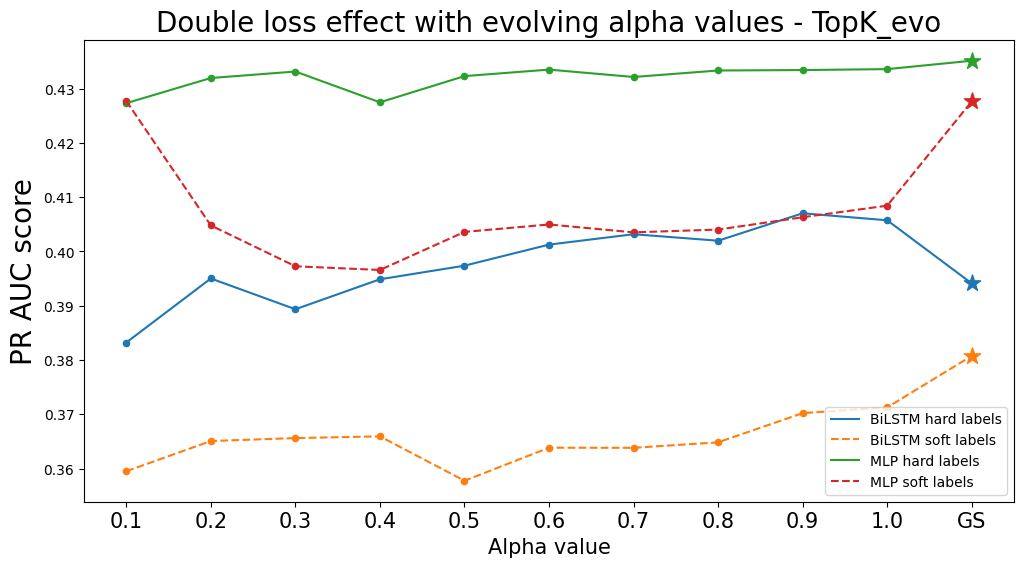

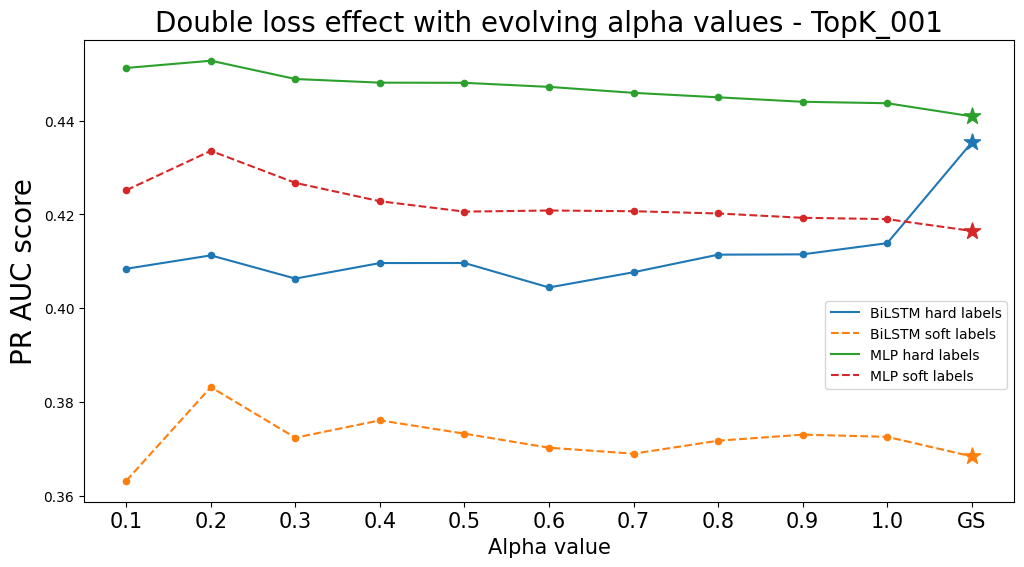

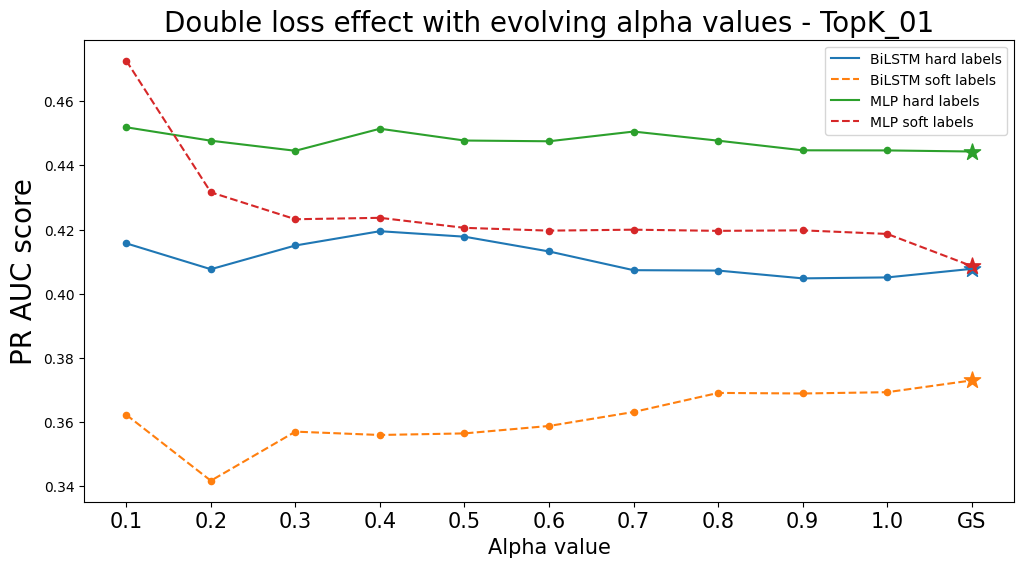

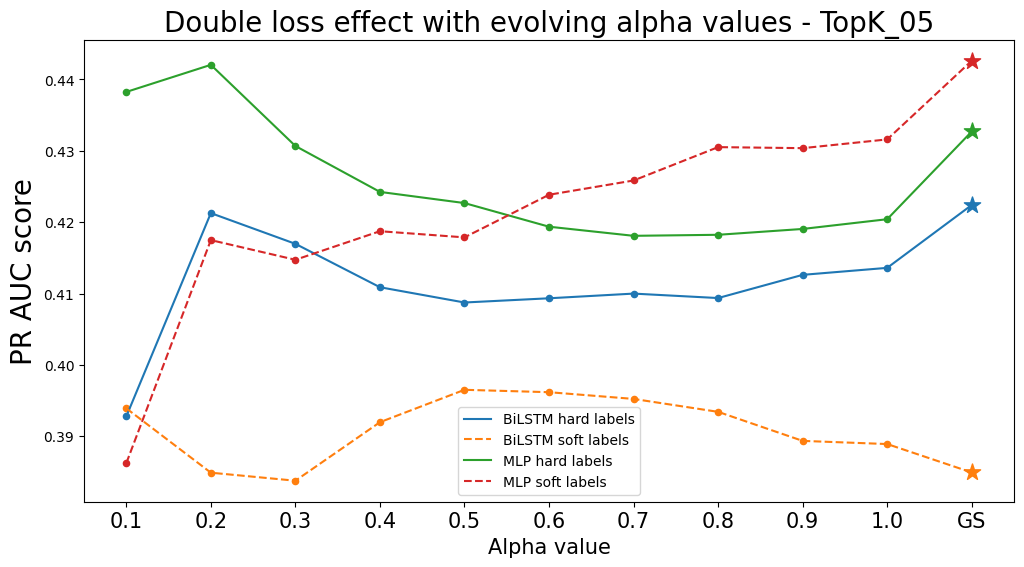

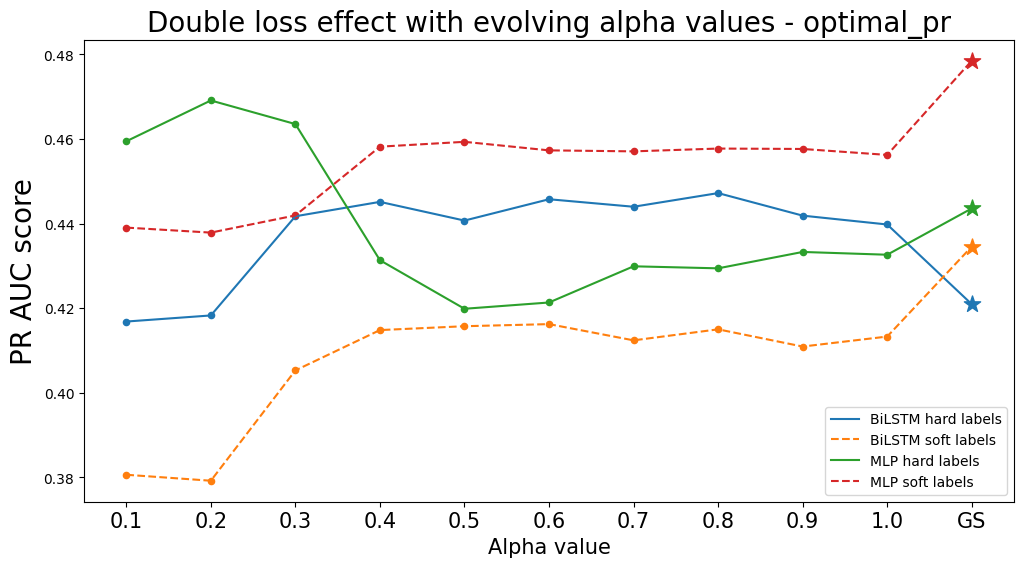

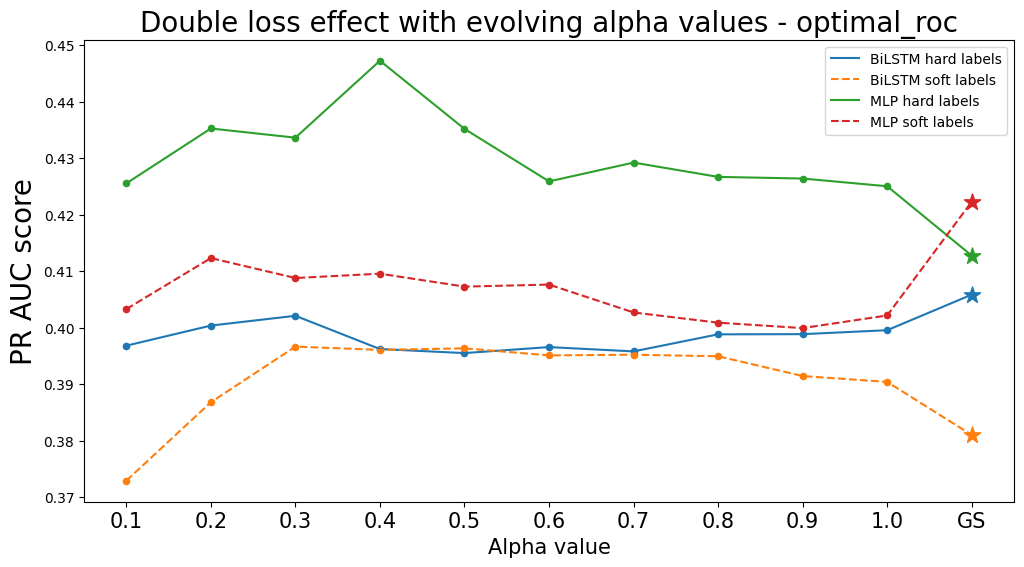

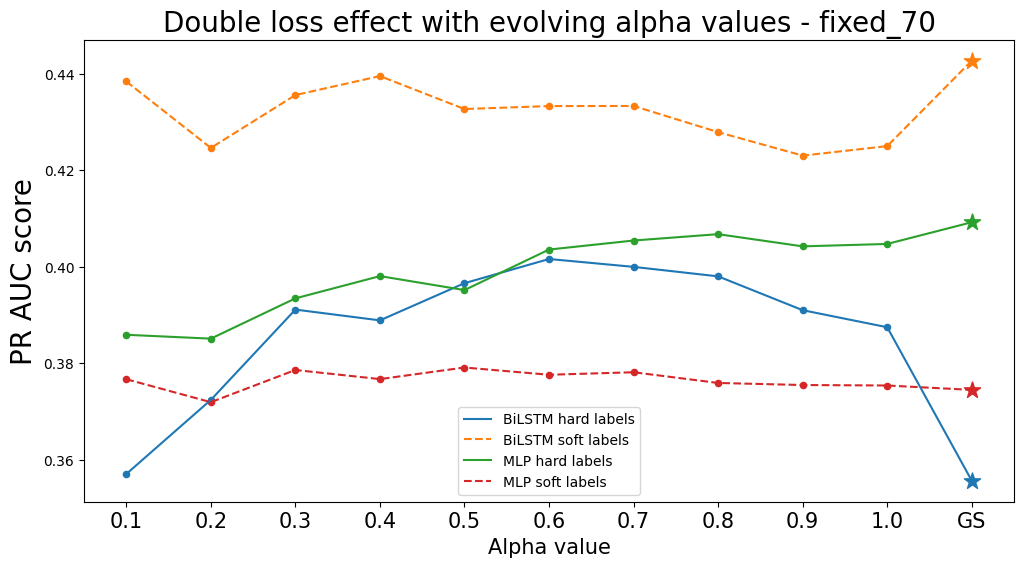

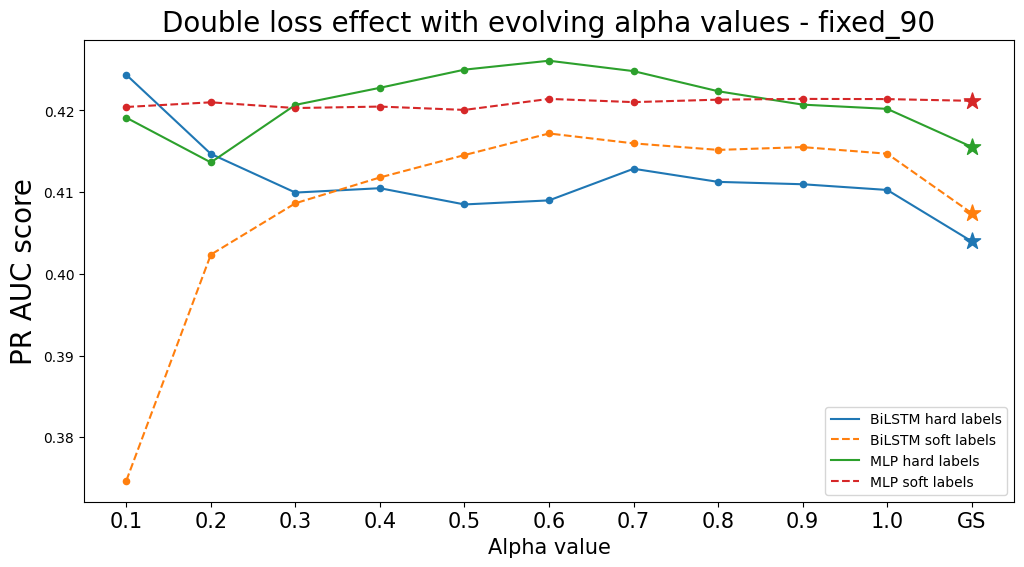

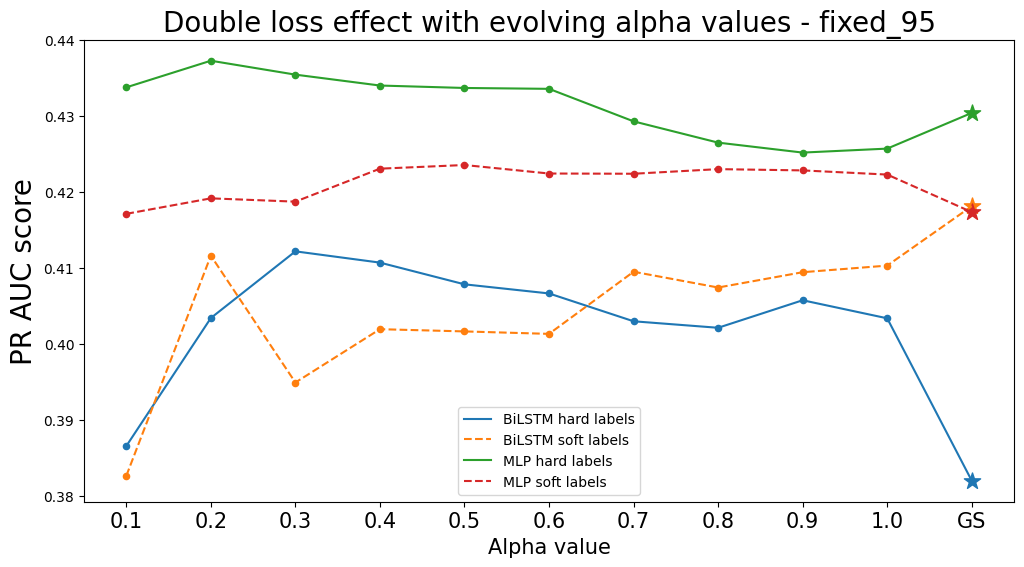

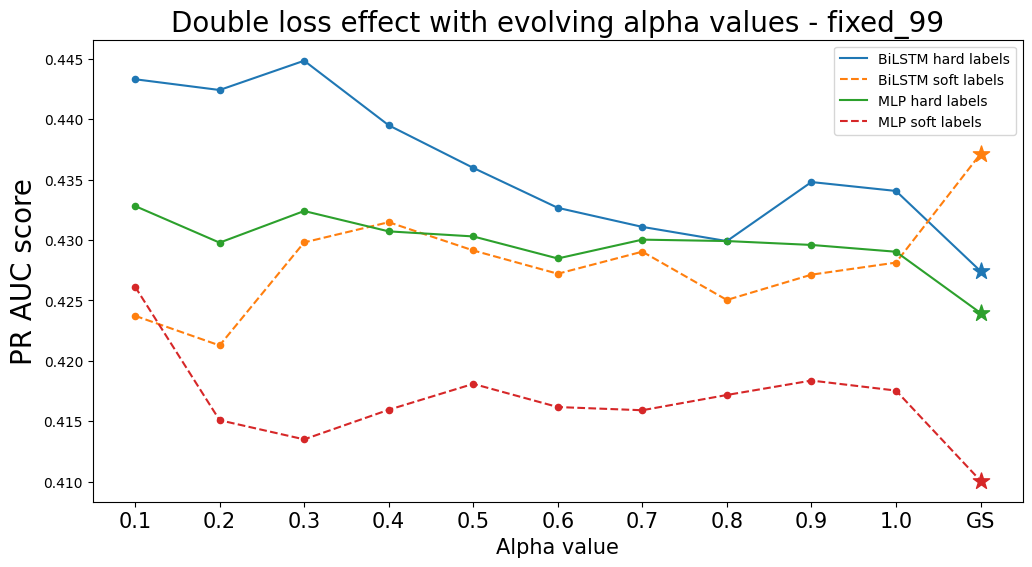

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [22]:
model = "BiLSTM"
pseudo_label_tech_dict = {"TopK": {"evo": [], "00": [], "01": [], "05": []}, "optimal": {"pr": [], "roc": []}, "fixed": {"70": [], "90": [], "95": [], "99": []}}
names = {"TopK": {"evo": [], "01": [], "05": [], "00": []}, "optimal": {"pr": [], "roc": []}, "fixed": {"70": [], "90": [], "95": [], "99": []}}
gs_dict_data = {"MLP": {
                        "HL": {"TopK": {"evo": [], "00": [], "01": [], "05": []}, "optimal": {"pr": [], "roc": []}, "fixed": {"70": [], "90": [], "95": [], "99": []}},
                        "SL": {"TopK": {"evo": [], "00": [], "01": [], "05": []}, "optimal": {"pr": [], "roc": []}, "fixed": {"70": [], "90": [], "95": [], "99": []}}
                        },
                "BiLSTM": {
                        "HL": {"TopK": {"evo": [], "00": [], "01": [], "05": []}, "optimal": {"pr": [], "roc": []}, "fixed": {"70": [], "90": [], "95": [], "99": []}},
                        "SL": {"TopK": {"evo": [], "00": [], "01": [], "05": []}, "optimal": {"pr": [], "roc": []}, "fixed": {"70": [], "90": [], "95": [], "99": []}}
                        }
                }

for file in os.listdir(f"{result_path}/{model}"):
    for tech, dict_ in pseudo_label_tech_dict.items():
        if tech in file:
            for k, v in dict_.items():
                if "double" in file and "prauc" in file and (k in file.split("_")[-1] or (k=='evo' and k in file) or (tech=="optimal" and k in file.replace('prauc', ''))):
                    with open(f"{result_path}/{model}/{file}", "r") as f:
                        pseudo_label_tech_dict[tech][k].append(json.load(f))
                        n = file.split("CVSummary_")[1].replace(".json", "")
                        n = n.replace("double_loss", "DL").replace("hard_loss", "HL").replace("soft_loss", "SL").replace("praucstop", "PR").replace("__", "_")

                        names[tech][k].append(f"{model}_{n}")
                    break
            break

for filename in os.listdir(f"{result_path}/{model}/GridSearch"):
    for tech, dict_ in pseudo_label_tech_dict.items():
        if tech in filename:
            for k, v in dict_.items():
                hard_or_soft = "HL" if "hard_loss" in filename else "SL"
                if (tech == "optimal" and k in filename.replace('prauc', '')) or (k in filename.split("_")[-1] and k != 'evo') or (k=='evo' and k in filename):
                    with open(f"{result_path}/{model}/GridSearch/{filename}", "r") as f:
                        gs_dict_data[model][hard_or_soft][tech][k].append(json.load(f))

                    break
            break

model = "MLP"

for file in os.listdir(f"{result_path}/{model}"):
    for tech, dict_ in pseudo_label_tech_dict.items():
        if tech in file:
            for k, v in dict_.items():
                if "double" in file and "prauc" in file and (k in file.split("_")[-1] or (k=='evo' and k in file) or (tech=="optimal" and k in file.replace('prauc', ''))):
                    with open(f"{result_path}/{model}/{file}", "r") as f:
                        pseudo_label_tech_dict[tech][k].append(json.load(f))
                        n = file.split("CVSummary_")[1].replace(".json", "")
                        n = n.replace("double_loss", "DL").replace("hard_loss", "HL").replace("soft_loss", "SL").replace("praucstop", "PR").replace("__", "_")

                        names[tech][k].append(f"{model}_{n}")
                    break
            break

for filename in os.listdir(f"{result_path}/{model}/GridSearch"):
    for tech, dict_ in pseudo_label_tech_dict.items():
        if tech in filename:
            for k, v in dict_.items():
                hard_or_soft = "HL" if "hard_loss" in filename else "SL"
                if (tech == "optimal" and k in filename.replace('prauc', '')) or (k in filename.split("_")[-1] and k != 'evo') or (k=='evo' and k in filename):
                    with open(f"{result_path}/{model}/GridSearch/{filename}", "r") as f:
                        gs_dict_data[model][hard_or_soft][tech][k].append(json.load(f))

                    break
            break

alphas = np.zeros(10)

for tech, dict_ in pseudo_label_tech_dict.items():
    for k, v in dict_.items():
        plt.figure(figsize=(12, 6))
        for j in range(0, len(v), 10):
            group = v[j:j+10]
            names_group = names[tech][k][j:j+10]

            x = np.arange(len(group)+1)

            model_name = "BiLSTM" if "BiLSTM" in names_group[0] else "MLP"
            hard_or_soft = "HL" if "HL" in names_group[0] else "SL"
            label = f"{model_name} soft labels" if "SL" in names_group[0] else f"{model_name} hard labels"
            linestyle = "-" if "HL" in names_group[0] else "--"

            values = [dict_['metrics']['pr_auc_mean'] for dict_ in group]

            gs_data = gs_dict_data[model_name][hard_or_soft][tech][k][0]
            gs_value = gs_data['metrics']['pr_auc_mean']

            values.append(gs_value)

            plt.plot(x, values, label=label, linestyle=linestyle)
            plt.scatter(x, values, marker="o", color=plt.gca().lines[-1].get_color(), s=20)

            plt.scatter(x[-1], values[-1], marker="*", color=plt.gca().lines[-1].get_color(), s=150)

        if tech == "TopK" and k == "00":
            plt.legend(bbox_to_anchor=(1.0, 0.45))
        else:
            plt.legend()
        title = f"Double loss effect with evolving alpha values - {tech}_{k.replace('00', '001')}"
        plt.title(f"{title}", fontsize=20)
        x_labels = np.round(np.arange(0.1, 1.1, 0.1), 2)
        x_labels = np.append(x_labels, ["GS"])
        plt.xticks(x, x_labels, fontsize=15)
        plt.ylabel("PR AUC score", fontsize=20)
        plt.xlabel("Alpha value", fontsize=15)
        plt.savefig(f"{image_path}/double_loss_effect_{tech}_{k}")
        plt.show()
        plt.close()

print(alphas)